<a href="https://colab.research.google.com/github/zenDev-2/McScrape/blob/main/McScrapeNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import csv 
import json
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

# Scrape of MA McDonald's Locations

Eastern Mass

In [2]:
url = "https://www.mcdonalds.com/googleappsv2/geolocation?latitude=42.0834335&longitude=-71.0183787&radius=80000&maxResults=500&country=us&language=en"

# payload + headers variables for each region generated using the Postman API Platform
# Postman: https://www.postman.com/
payload={}
headers = {
  'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:98.0) Gecko/20100101 Firefox/98.0',
  'Accept': '*/*',
  'Accept-Language': 'en-US,en;q=0.5',
  'Accept-Encoding': 'gzip, deflate, br',
  'Referer': 'https://www.mcdonalds.com/us/en-us/restaurant-locator.html',
  'Connection': 'keep-alive',
  'Cookie': '_abck=8010DD6D2623B97BC30AF849750A25F1~0~YAAQZvzDFwFtGQeAAQAAQI7QCweooECTD5gRUqF7MX1HZnW9gUketOCPJggMZWg5eF2iATIabu9Vi236r4mXachXiRy+nqywF+WgO6eVHmMVRFzj15T4LyKY2NsEvkm7irfyQcNGke207sWutoiXUl4qO1I7eWjPTVGlJVtNbT9nLlmmvdodKroK6lgzFCVzVqGKiFwiY915V9fxoZCSmbVimUZSn1E+ZIsh0l6G/MALG3AqaPstwU4ZYUQo3XXTxr/DtVKCJtZrIRNkjvxhFp8yXmDoQB0hjYeVjM+PNOuOP3GyoA9z++jmshxAFZD2trYyxaSZtzETi1Re0+UbxhL2FYlO8uma1yrQHmhuqwJBJhwyeU+m3K+KZueINPGdOYhu8HejdX2b1IX68RFE0ncQMZWO9Pt4rCo+QQ==~-1~-1~-1; AMCV_786ABB6B55C1DA777F000101%40AdobeOrg=-2121179033%7CMCIDTS%7C19091%7CMCMID%7C31674695377750397280010411148622937438%7CMCAAMLH-1650068863%7C7%7CMCAAMB-1650068863%7C6G1ynYcLPuiQxYZrsz_pkqfLG9yMXBpb2zX5dvJdYQJzPXImdj0y%7CMCOPTOUT-1649471263s%7CNONE%7CMCAID%7CNONE%7CvVersion%7C5.3.0; _gcl_au=1.1.955101660.1648148668; OptanonConsent=isIABGlobal=false&datestamp=Fri+Apr+08+2022+20%3A54%3A20+GMT-0400+(Eastern+Daylight+Time)&version=6.31.0&hosts=&landingPath=NotLandingPage&groups=C0001%3A1%2CC0002%3A1%2CC0003%3A1%2CC0004%3A1&AwaitingReconsent=false&geolocation=%3B; s_ecid=MCMID%7C31674695377750397280010411148622937438; s_lastvisit=1649465708699; _clck=1ls2n6b|1|f0h|0; MCDCountry_code=US; bm_sz=DA82445F2EC6C20216EAC9903640F446~YAAQLDovF3iqGgOAAQAAiSomCw/ttVASDkVEqwkuguD5DAzrEe+mszjAP5MkTGU2eSOEE/kQqTKZG8AWDCx1+AkwfZelxlPJP5cyf8REbE74rl0j0Gz7zI7ORZ43yaizJwg5TqE3z46dPIktXQ7vDHlcSbbH+3qXc6nxGcVNqAYDkRYYyb9tNxnijduMW2Lju0MPw1AsgcSfj9FPx/bGrTYYhBE8qJt8SEpGPg43ldl98+rnk68l7xq6CrfazyHjQUt43nruX9V9e6bLbpWOuWlH5WJBT85W9jYiTxFOmaXLkLoNWIo=~3422259~3228212; PLTGE=%2Cevent93=804%2Cevent94=1119%2Cevent95=2%2Cevent109=2273%2Cevent99=49; prevPageName=restaurant%20locator; AMCVS_786ABB6B55C1DA777F000101%40AdobeOrg=1; s_ppvl=restaurant%2520locator%2C58%2C58%2C1145%2C2560%2C1145%2C2560%2C1440%2C1%2CP; s_ppv=restaurant%2520locator%2C58%2C58%2C1145%2C2560%2C451%2C2560%2C1440%2C1%2CP; s_cc=true; _clsk=1d1hl1s|1649465667610|5|1|www.clarity.ms/eus-c/collect; s_sq=%5B%5BB%5D%5D; affinity="ea0cf0d8d1346ed2"; OptanonAlertBoxClosed=2022-04-08T21:50:22.087Z; s_lastvisit_s=Less%20than%201%20day; ak_bmsc=50725956E371683EC86950811CF049F0~000000000000000000000000000000~YAAQZvzDF3wJGQeAAQAADr+3Cw+d8gUIl04GIApwERXzjSOql/47c3Ui+ucMhNdFpGrgtV5hMfngocCGiptD6B1t/X7h54dxIcAPfYbSAt2E64gDJHrIcDQEoLSiUDmhQeJFwS8234ECTofEZ5xuaquZsEUCGpkqr7kojeS2oelTFqbxUvcL4w69eDfChxkB+EB7pOcyiV9jEiwxmIxBWHafI3TrMFHx4DvTVNfVxHnndUbAl4jGuEK82AD1o6RdDi4zctuMPn7kfpkOh8B5aDYp3j7x/liTVQXmoUEtuNOwHFEkDJHO5SGOLK3ZEWT4OcrfGmBwncFuyw1mIQZivM/0RfrQiLGBxAd6Eyk+UFVpDse3QZ7rt2k3/N4J7jyUxwat2ibtoC22tseoUw==; bm_mi=D191EE539F19FD86375DBB73CD021135~z7XQCp6McudyTX3s/tpE6uZYWfgvOYPm7VEXG2G9+lTrnbU5JTyT068wKuxO558m9EilnW5Wb8u8JBf0SrkHalcnb6yw3j1SguSfPwEcIpBzFLA9WYD/N1xOx8A8FGWA6jyl+waUv7jS3VbMTQ9FsnbAo7k6aiQHAPmGkeJSQ2maSCsM6HKSp4inCe+LR7qYe00FxAPPryJlWQUSNoVNncPk228OuAWOfJY8/Xzg39/2ttshk3Y2HQh8FKJHmf9Bg5QPPP7fZ4TVv1XPkQXDvw==; bm_sv=3CE16D1D65B6620033B9947FA910CA84~egisskdOn5boHsToASz2aH8VVkvcG2OIfBKI/Yplq7L4w7Fd0KyiySOy3Wo+u3rkAg6IpZGdY2UnCodQppBE1h694rJLtdKN8xDHaljNERV3GONi3jRlnjMG9+KZJPNmCvwaTquwPDNYTFu5A0zRAap9n0t4fM8I0yUshJMe3AU=; _uetsid=98e06000b78511ecb06d394eb5901821; _uetvid=3aa5da60aba511ecb0b86bf586023803; _abck=8010DD6D2623B97BC30AF849750A25F1~-1~YAAQzzoiF7qt1gGAAQAAvfLiCwd1lWbnFmAo6EKGBBIPrJAtNngyszwGxWlTflf684yNtpKE6rBb4YLWWuexUDHut/mionyWHrWMXm2nLMAyNcsA63W+ZOQfA/bAC4XmLy7r3L+GtyGYf9p+S3VwJCPjtwfsFjVBetWvXBofctAmBhPmaI4tzlkwoA9s2iMl5af3SMc4243hi/dr3yqwdObbEXzMOl5beqYhx963GaMXBG7n9w8zWrOQqpydqvJyYnpvuRV7fArAQkDYr+ih87jMg7s2Z869mSVp9yhbqVhy3ekYI0+46CG1ue+rHqotS9vpx69O9jzlF/G4QffHnoBQIkb5DdQwQ/VOfD71ZyDugEA/v6KYV4DtGTSnU25w5/35L997RH5mHPjDnSfEoKXrj06YTayCRy/c/w==~0~-1~-1; ak_bmsc=50725956E371683EC86950811CF049F0~000000000000000000000000000000~YAAQ2DoiF6kKPgKAAQAAlrXiCw96ifprxviyuyY1+LaKd72TLH8HT0ZXCH67adG0aknmR5naMofLAUv3gRQCwdebjtWrYlmUMmvDv08r++/mIimcIVxdcPvJLiIZytvctGbD6+dyceFhCfshZYLyYgAZ/FKwFCzohzBgkE9aZ2RVO8yJ4Tr/9EX7rljtAO54C5SysIG073D0i+IxQPQPDnq/ePuqeV0CY8jVHO8UuvYgkyjNwaPzpeU2Srjw4nduzBH8jIg+cpPpDp/9TzoDWG0t5ukDEdCR8u9YXOtZi1SjA08IqZ46qWYlmNbQ/PwaVmoFCItJO2WQOuX1+FTOt1yxwOWA8kuyY0pXxO9Q2ziUoEF28BmhyDCrV/J2TTnQo6aWfTl24B79LEcFgi3cA27/gXPoqjgtKDPLwlLgjyntpOJG+w/+FcosrrA3ZG4oM4IuO/M=; bm_sv=3CE16D1D65B6620033B9947FA910CA84~egisskdOn5boHsToASz2aH8VVkvcG2OIfBKI/Yplq7L4w7Fd0KyiySOy3Wo+u3rkAg6IpZGdY2UnCodQppBE1h694rJLtdKN8xDHaljNERVGrQulSNipxEYrz/hdhf1A/jPoFcVzDSbyfiC7p6oNbgrsxrDcvgZBDdqBo1fIhsQ=; MCDCountry_code=US',
  'Sec-Fetch-Dest': 'empty',
  'Sec-Fetch-Mode': 'cors',
  'Sec-Fetch-Site': 'same-origin'
}

responseEast = requests.request("GET", url, headers=headers, data=payload)

In [3]:
storesEast = json.loads(responseEast.text)

def collectMDs(stores):
  mds = []
  features = stores['features']
  for i in range(len(features)):
    d = features[i]
    for key in d:
      if key == 'properties':
        if d[key]['subDivision'] == 'MA':
          mds+= [{
              'street': d[key]['addressLine1'],
              'city': d[key]['addressLine3'],
              'postcode': d[key]['postcode'],
              'state': d[key]['subDivision']
          }]
  return mds

mdsE = collectMDs(storesEast)
print(f'mdsE count: {len(mdsE)}')

mdsE count: 191


Central Mass

In [4]:
url = "https://www.mcdonalds.com/googleappsv2/geolocation?latitude=42.3490548&longitude=-72.1986558&radius=80000&maxResults=500&country=us&language=en"

payload={}
headers = {
  'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:98.0) Gecko/20100101 Firefox/98.0',
  'Accept': '*/*',
  'Accept-Language': 'en-US,en;q=0.5',
  'Accept-Encoding': 'gzip, deflate, br',
  'Referer': 'https://www.mcdonalds.com/us/en-us/restaurant-locator.html',
  'Connection': 'keep-alive',
  'Cookie': '_abck=8010DD6D2623B97BC30AF849750A25F1~0~YAAQZvzDF9cJGQeAAQAAROO3CwepGuNNlR3HmuU3kdXqr9cPC+m8LM3r57nVUrv8UqSZSq8f+/VS6YoO8xcGUWxSzeMlxy6wkYVnrzQ+nZRUEf6cQK+I6XegIyCnNAqSbTYZoSS57HVwCgPnrI3J7twuEzjtNgVnFL3rc+UpSduv5f5FWT8xvVqTEv/bsZfhv+rinq9PL1n1RNLfv8fPPru0JuXBJHB/BTyM5ig7RWvtz4i9PG270hOEHJKKCm2Q8Uc80UJGoZpvHXJOvqiSOs7ow3389G3AflxLIwO+9r0N94v5Sa1zBqKYTD1EJKr1sPGvkvzgkFZPXMjTGTfzQiBQmFOButq5iylupOQiEbNqec2ySOvUdeuuubQjFJc8bI58RBhydFmWudgWZvrrpiH64fz+hbIh1SSfbA==~-1~||-1||~-1; AMCV_786ABB6B55C1DA777F000101%40AdobeOrg=-2121179033%7CMCIDTS%7C19091%7CMCMID%7C31674695377750397280010411148622937438%7CMCAAMLH-1650068863%7C7%7CMCAAMB-1650068863%7C6G1ynYcLPuiQxYZrsz_pkqfLG9yMXBpb2zX5dvJdYQJzPXImdj0y%7CMCOPTOUT-1649471263s%7CNONE%7CMCAID%7CNONE%7CvVersion%7C5.3.0; _gcl_au=1.1.955101660.1648148668; OptanonConsent=isIABGlobal=false&datestamp=Fri+Apr+08+2022+20%3A27%3A43+GMT-0400+(Eastern+Daylight+Time)&version=6.31.0&hosts=&landingPath=NotLandingPage&groups=C0001%3A1%2CC0002%3A1%2CC0003%3A1%2CC0004%3A1&AwaitingReconsent=false&geolocation=%3B; s_ecid=MCMID%7C31674695377750397280010411148622937438; s_lastvisit=1649464072128; _clck=1ls2n6b|1|f0h|0; MCDCountry_code=US; bm_sz=DA82445F2EC6C20216EAC9903640F446~YAAQLDovF3iqGgOAAQAAiSomCw/ttVASDkVEqwkuguD5DAzrEe+mszjAP5MkTGU2eSOEE/kQqTKZG8AWDCx1+AkwfZelxlPJP5cyf8REbE74rl0j0Gz7zI7ORZ43yaizJwg5TqE3z46dPIktXQ7vDHlcSbbH+3qXc6nxGcVNqAYDkRYYyb9tNxnijduMW2Lju0MPw1AsgcSfj9FPx/bGrTYYhBE8qJt8SEpGPg43ldl98+rnk68l7xq6CrfazyHjQUt43nruX9V9e6bLbpWOuWlH5WJBT85W9jYiTxFOmaXLkLoNWIo=~3422259~3228212; PLTGE=%2Cevent93=921%2Cevent94=1284%2Cevent95=3%2Cevent109=2067%2Cevent99=32; prevPageName=restaurant%20locator; AMCVS_786ABB6B55C1DA777F000101%40AdobeOrg=1; s_ppvl=restaurant%2520locator%2C60%2C60%2C1167%2C2560%2C490%2C2560%2C1440%2C1%2CP; s_ppv=restaurant%2520locator%2C60%2C60%2C1167%2C2560%2C490%2C2560%2C1440%2C1%2CP; s_cc=true; _clsk=1d1hl1s|1649464065805|2|1|www.clarity.ms/eus-c/collect; s_sq=mcdusproduts%3D%2526pid%253Drestaurant%252520locator%2526pidt%253D1%2526oid%253D%25250A%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%25250A%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%25250A%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%252520%2526oidt%253D3%2526ot%253DSUBMIT; affinity="ea0cf0d8d1346ed2"; OptanonAlertBoxClosed=2022-04-08T21:50:22.087Z; s_lastvisit_s=Less%20than%201%20day; ak_bmsc=50725956E371683EC86950811CF049F0~000000000000000000000000000000~YAAQZvzDF3wJGQeAAQAADr+3Cw+d8gUIl04GIApwERXzjSOql/47c3Ui+ucMhNdFpGrgtV5hMfngocCGiptD6B1t/X7h54dxIcAPfYbSAt2E64gDJHrIcDQEoLSiUDmhQeJFwS8234ECTofEZ5xuaquZsEUCGpkqr7kojeS2oelTFqbxUvcL4w69eDfChxkB+EB7pOcyiV9jEiwxmIxBWHafI3TrMFHx4DvTVNfVxHnndUbAl4jGuEK82AD1o6RdDi4zctuMPn7kfpkOh8B5aDYp3j7x/liTVQXmoUEtuNOwHFEkDJHO5SGOLK3ZEWT4OcrfGmBwncFuyw1mIQZivM/0RfrQiLGBxAd6Eyk+UFVpDse3QZ7rt2k3/N4J7jyUxwat2ibtoC22tseoUw==; bm_mi=D191EE539F19FD86375DBB73CD021135~z7XQCp6McudyTX3s/tpE6uZYWfgvOYPm7VEXG2G9+lTrnbU5JTyT068wKuxO558mhNs89s1HTGHQ7hhCPJBnwJxm6TTvfV/tWTS4z+DNBOM7uFqQHRQpm5K5qWm1AGnLT+B9zs4vp+ZUx9pZqghZSTwjB7ItSPwhlAxwb469SPtEwSG91A3OsUTjQb2XE9Bedtq+CyTv00vI4V8QZ3mq03VGVlNwG30Z8bxEi9GGroTBXF+VxCavEMBLyXcoYAJZnWGPjOgoXG4tYDJgjFWk5Q==; bm_sv=3CE16D1D65B6620033B9947FA910CA84~egisskdOn5boHsToASz2aH8VVkvcG2OIfBKI/Yplq7L4w7Fd0KyiySOy3Wo+u3rkAg6IpZGdY2UnCodQppBE1h694rJLtdKN8xDHaljNERXaxkJURQ5qbAdymbtEDBhZkIyLqsMpJJcJ+GQQXCZALTB8DH6yEaUzWRKw7P0rbu0=; _uetsid=98e06000b78511ecb06d394eb5901821; _uetvid=3aa5da60aba511ecb0b86bf586023803; _abck=8010DD6D2623B97BC30AF849750A25F1~-1~YAAQzzoiFxmt1gGAAQAAyt/iCwcSYLmodlvmILGu2GvmYtRYJoLkN12vySUOzW/Tm46kYSQH5KrLZMiGdlQvApRRLoDEOFbh1NSbRjiZvW1LWrBj8TNYiM+9I3swcAZGbnbZzvBFlfkA7r8BsFMMLgTjWr1kbqq9l+l+YKtPwheYugWoTZ610Dn/sK446LF5OmlbPYx5tq5HoVBpjJ6wPZQ2Ggk5mvYxqoavUO/trm+VFg9Wwq/8xKaIvGxeO7ZL1jgaEA4IhHJ5N6W3dzG0zE8NpAUsjcQp8JeJPehhQwlS2oB4CeckkKC/YK12auYjvDio9/GlwLUmsPBEDAuacXfOGsqqlZ/mXRlXsUs26Vh/KLclqmOWQFsR8KrAwcKdUuHqAWMA1yW2vj6apEJAdsucYHJYkSizDKG8Ig==~0~-1~-1; ak_bmsc=50725956E371683EC86950811CF049F0~000000000000000000000000000000~YAAQ2DoiF6kKPgKAAQAAlrXiCw96ifprxviyuyY1+LaKd72TLH8HT0ZXCH67adG0aknmR5naMofLAUv3gRQCwdebjtWrYlmUMmvDv08r++/mIimcIVxdcPvJLiIZytvctGbD6+dyceFhCfshZYLyYgAZ/FKwFCzohzBgkE9aZ2RVO8yJ4Tr/9EX7rljtAO54C5SysIG073D0i+IxQPQPDnq/ePuqeV0CY8jVHO8UuvYgkyjNwaPzpeU2Srjw4nduzBH8jIg+cpPpDp/9TzoDWG0t5ukDEdCR8u9YXOtZi1SjA08IqZ46qWYlmNbQ/PwaVmoFCItJO2WQOuX1+FTOt1yxwOWA8kuyY0pXxO9Q2ziUoEF28BmhyDCrV/J2TTnQo6aWfTl24B79LEcFgi3cA27/gXPoqjgtKDPLwlLgjyntpOJG+w/+FcosrrA3ZG4oM4IuO/M=; bm_sv=3CE16D1D65B6620033B9947FA910CA84~egisskdOn5boHsToASz2aH8VVkvcG2OIfBKI/Yplq7L4w7Fd0KyiySOy3Wo+u3rkAg6IpZGdY2UnCodQppBE1h694rJLtdKN8xDHaljNERVGrQulSNipxEYrz/hdhf1A/jPoFcVzDSbyfiC7p6oNbgrsxrDcvgZBDdqBo1fIhsQ=; MCDCountry_code=US',
  'Sec-Fetch-Dest': 'empty',
  'Sec-Fetch-Mode': 'cors',
  'Sec-Fetch-Site': 'same-origin'
}

responseCentral = requests.request("GET", url, headers=headers, data=payload)
storesCentral = json.loads(responseCentral.text)
mdsC = collectMDs(storesCentral)
print(f'mdsC count: {len(mdsC)}')

mdsC count: 156


Western Mass

In [5]:
url = "https://www.mcdonalds.com/googleappsv2/geolocation?latitude=42.3319904&longitude=-73.0829366&radius=80000&maxResults=500&country=us&language=en"

payload={}
headers = {
  'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:98.0) Gecko/20100101 Firefox/98.0',
  'Accept': '*/*',
  'Accept-Language': 'en-US,en;q=0.5',
  'Accept-Encoding': 'gzip, deflate, br',
  'Referer': 'https://www.mcdonalds.com/us/en-us/restaurant-locator.html',
  'Connection': 'keep-alive',
  'Cookie': '_abck=8010DD6D2623B97BC30AF849750A25F1~0~YAAQZvzDF6GjGQeAAQAAbNTdCwdcsApETGTM3+AmrHoSxKKEmNAnjeH21r25ce9mTOUK3fAXm5rD/IF9Ws1QIH3WsaFYV7sYDw1ZX9DTgaaJJl/g6Y+RIp0SU7vzENuKcmBEaUWs0Ut10lyZFkpvrreTWWwaf2RHFaeUnmNOi2BIkFcwm8z6H9QNhirjwKX1ZrKsu5mBFTnzaU1AHLJEYXRbGmcI0/6j5MxBx8DxwHZ6koy129xPoebNZGVuJ9NL8F4dVfMdKFF6A621DyK81hm3dKsB+b2QcetsyXz24Ck6Vo6eZ5XqrdOHYWz0hlZO1/sWL7vMteBKXyeZLuNNdy17YdQT2DGWEl3Qn96z7TGb/3wr58ovNBFxVZzZSJRQqlRFrB8DVX87sNRTuvksncceL5vT4SPBEMJ/gg==~-1~-1~-1; AMCV_786ABB6B55C1DA777F000101%40AdobeOrg=-2121179033%7CMCIDTS%7C19091%7CMCMID%7C31674695377750397280010411148622937438%7CMCAAMLH-1650068863%7C7%7CMCAAMB-1650068863%7C6G1ynYcLPuiQxYZrsz_pkqfLG9yMXBpb2zX5dvJdYQJzPXImdj0y%7CMCOPTOUT-1649471263s%7CNONE%7CMCAID%7CNONE%7CvVersion%7C5.3.0; _gcl_au=1.1.955101660.1648148668; OptanonConsent=isIABGlobal=false&datestamp=Fri+Apr+08+2022+21%3A09%3A07+GMT-0400+(Eastern+Daylight+Time)&version=6.31.0&hosts=&landingPath=NotLandingPage&groups=C0001%3A1%2CC0002%3A1%2CC0003%3A1%2CC0004%3A1&AwaitingReconsent=false&geolocation=%3B; s_ecid=MCMID%7C31674695377750397280010411148622937438; s_lastvisit=1649466548366; _clck=1ls2n6b|1|f0h|0; MCDCountry_code=US; bm_sz=DA82445F2EC6C20216EAC9903640F446~YAAQLDovF3iqGgOAAQAAiSomCw/ttVASDkVEqwkuguD5DAzrEe+mszjAP5MkTGU2eSOEE/kQqTKZG8AWDCx1+AkwfZelxlPJP5cyf8REbE74rl0j0Gz7zI7ORZ43yaizJwg5TqE3z46dPIktXQ7vDHlcSbbH+3qXc6nxGcVNqAYDkRYYyb9tNxnijduMW2Lju0MPw1AsgcSfj9FPx/bGrTYYhBE8qJt8SEpGPg43ldl98+rnk68l7xq6CrfazyHjQUt43nruX9V9e6bLbpWOuWlH5WJBT85W9jYiTxFOmaXLkLoNWIo=~3422259~3228212; PLTGE=%2Cevent93=541%2Cevent94=798%2Cevent95=2%2Cevent109=1498%2Cevent99=28; prevPageName=restaurant%20locator; AMCVS_786ABB6B55C1DA777F000101%40AdobeOrg=1; s_ppvl=restaurant%2520locator%2C57%2C57%2C1118%2C2560%2C984%2C2560%2C1440%2C1%2CP; s_ppv=restaurant%2520locator%2C57%2C57%2C1118%2C2560%2C984%2C2560%2C1440%2C1%2CP; s_cc=true; _clsk=1d1hl1s|1649466547432|7|1|www.clarity.ms/eus-c/collect; s_sq=%5B%5BB%5D%5D; affinity="ea0cf0d8d1346ed2"; OptanonAlertBoxClosed=2022-04-08T21:50:22.087Z; s_lastvisit_s=Less%20than%201%20day; ak_bmsc=50725956E371683EC86950811CF049F0~000000000000000000000000000000~YAAQZvzDF3wJGQeAAQAADr+3Cw+d8gUIl04GIApwERXzjSOql/47c3Ui+ucMhNdFpGrgtV5hMfngocCGiptD6B1t/X7h54dxIcAPfYbSAt2E64gDJHrIcDQEoLSiUDmhQeJFwS8234ECTofEZ5xuaquZsEUCGpkqr7kojeS2oelTFqbxUvcL4w69eDfChxkB+EB7pOcyiV9jEiwxmIxBWHafI3TrMFHx4DvTVNfVxHnndUbAl4jGuEK82AD1o6RdDi4zctuMPn7kfpkOh8B5aDYp3j7x/liTVQXmoUEtuNOwHFEkDJHO5SGOLK3ZEWT4OcrfGmBwncFuyw1mIQZivM/0RfrQiLGBxAd6Eyk+UFVpDse3QZ7rt2k3/N4J7jyUxwat2ibtoC22tseoUw==; bm_mi=D191EE539F19FD86375DBB73CD021135~z7XQCp6McudyTX3s/tpE6uZYWfgvOYPm7VEXG2G9+lTrnbU5JTyT068wKuxO558m9EilnW5Wb8u8JBf0SrkHalcnb6yw3j1SguSfPwEcIpBzFLA9WYD/N1xOx8A8FGWA6jyl+waUv7jS3VbMTQ9FsnbAo7k6aiQHAPmGkeJSQ2maSCsM6HKSp4inCe+LR7qYe00FxAPPryJlWQUSNoVNnR+2OSuX3qlKGmLgD77Jfp1O7NqNu48sgQ28CcZrYjD/cQQHCfPTSs6I20Q+8CQjmQ==; bm_sv=3CE16D1D65B6620033B9947FA910CA84~egisskdOn5boHsToASz2aH8VVkvcG2OIfBKI/Yplq7L4w7Fd0KyiySOy3Wo+u3rkAg6IpZGdY2UnCodQppBE1h694rJLtdKN8xDHaljNERW+Qc5rKqPSwlOXSQivzWV/oTtfnflxSuTh3t3ASnuqjqrWQHIWwgddCCPZ4JZ9NUo=; _uetsid=98e06000b78511ecb06d394eb5901821; _uetvid=3aa5da60aba511ecb0b86bf586023803; _abck=8010DD6D2623B97BC30AF849750A25F1~-1~YAAQzzoiF52r1gGAAQAAw7fiCwfv4/eEEsPXyBE9X6+UhEX/6tlJDuAKKYkY4IymdKEYwq/vcjN3p8wnnzvfgM++go5MqSatf/+dDUtkzKpynb/ayn7VGuYrPZL6YRCkxk02ChawvGhKZ+oIInntRLKwbpVWM6XUFugWRsJN2zQd9jM65Jix9FEeCQA5i42k80Fdo/Uv//0fHGHgFSMw+11ACo8W7lL/iLPQu9VqoLY+ab/Cxs6VCIrIktJCpec341FQUEStt7UzcJGAkM7ekr33Ch+X66wsMRdBykIwIeDsvCaNk2Dhyt8h+wyPZI0/kEe3waA0C4JAAn/IP91Erf0ogD7cDPvPyIjL7HWu9dMckQrdnkhczPB57ui+5Ikopio/BPg8n/V9l+sCAbT6eBNSEgls8KBKjKRvTg==~0~-1~-1; ak_bmsc=50725956E371683EC86950811CF049F0~000000000000000000000000000000~YAAQ2DoiF6kKPgKAAQAAlrXiCw96ifprxviyuyY1+LaKd72TLH8HT0ZXCH67adG0aknmR5naMofLAUv3gRQCwdebjtWrYlmUMmvDv08r++/mIimcIVxdcPvJLiIZytvctGbD6+dyceFhCfshZYLyYgAZ/FKwFCzohzBgkE9aZ2RVO8yJ4Tr/9EX7rljtAO54C5SysIG073D0i+IxQPQPDnq/ePuqeV0CY8jVHO8UuvYgkyjNwaPzpeU2Srjw4nduzBH8jIg+cpPpDp/9TzoDWG0t5ukDEdCR8u9YXOtZi1SjA08IqZ46qWYlmNbQ/PwaVmoFCItJO2WQOuX1+FTOt1yxwOWA8kuyY0pXxO9Q2ziUoEF28BmhyDCrV/J2TTnQo6aWfTl24B79LEcFgi3cA27/gXPoqjgtKDPLwlLgjyntpOJG+w/+FcosrrA3ZG4oM4IuO/M=; bm_sv=3CE16D1D65B6620033B9947FA910CA84~egisskdOn5boHsToASz2aH8VVkvcG2OIfBKI/Yplq7L4w7Fd0KyiySOy3Wo+u3rkAg6IpZGdY2UnCodQppBE1h694rJLtdKN8xDHaljNERUI6keSMTIKdt6z7LreC3BJpi8wtvB2Vlbg/KKVCfhX4zf+f2kru/8HZ9qDE9T6yr4=; MCDCountry_code=US',
  'Sec-Fetch-Dest': 'empty',
  'Sec-Fetch-Mode': 'cors',
  'Sec-Fetch-Site': 'same-origin'
}

responseWest = requests.request("GET", url, headers=headers, data=payload)
storesWest = json.loads(responseWest.text)
mdsW = collectMDs(storesWest)
print(f'mdsW count: {len(mdsW)}')

mdsW count: 72


In [6]:
mdsMerged = mdsE + mdsC + mdsW 
print(f'initial merge: {len(mdsMerged)}')

finalMerge = []
check = set()

for d in mdsMerged.copy():
  j = json.dumps(d)
  if j not in check:
    check.add(j)
    finalMerge += [d]
print(f"final merge (# of all unique McDonald's locations in MA): {len(finalMerge)}")

allPostCodes = []
for md in finalMerge:
  allPostCodes.append(md['postcode'])

initial merge: 419
final merge (# of all unique McDonald's locations in MA): 234


McDonald's Locations CSV and DataFrame

In [7]:
df = pd.DataFrame.from_dict(finalMerge) 
df.to_csv (r'McD_MA.csv', index = False, header=True)
df.head(n=234)

,street,city,postcode,state
0,664 Crescent St Route 27,Brockton,02302,MA
1,908 N Montello St,Brockton,02301,MA
2,715 Belmont St,Brockton,02301,MA
3,334 N Pearl St,Brockton,02301,MA
4,323 Bedford Street,Whitman,02333,MA
...,...,...,...,...
229,245 Housatonic St,Lee,01238,MA
230,240 West Road,Lee,01238,MA
231,370 West Stockbridge Road,Lee,01238,MA
232,445 W Housatonic St,Pittsfield,01201,MA


# Restaurant Count by County

In [8]:
def mdCount(countyCodes, allCodes):
  isolated = []
  for code in allCodes:
    if code in countyCodes:
      isolated.append(code)
  return {
      'mdCodes': isolated,
      'mdCount': len(isolated)
  }

Barnstable County

In [9]:
postcodes = df.loc[:, 'postcode']
barnstableZips = ['02532', '02536', '02537', '02540', '02542', '02543', '02556', '02559', '02562', '02563', '02601', '02630', '02631', '02632', '02633', '02635', '02638', '02639', '02642', '02644', '02645', '02646', '02648', '02649', '02650', '02653', '02655', '02657', '02659', '02660', '02664', '02667', '02668', '02670', '02671', '02673', '02675']
barnstable = mdCount(barnstableZips, postcodes)
barnstable

{'mdCodes': ['02532', '02562', '02532', '02536', '02601', '02601', '02664'],
 'mdCount': 7}

Berkshire County

In [10]:
berkshireZips = ['01201', '01220', '01222', '01223', '01224', '01225', '01226', '01230', '01235', '01236', '01237', '01238', '01240', '01245', '01247', '01252', '01253', '01254', '01255', '01256', '01257', '01259', '01266', '01267', '01270', '01343']
berkshire = mdCount(berkshireZips, postcodes)
berkshire

{'mdCodes': ['01220',
  '01201',
  '01247',
  '01238',
  '01238',
  '01238',
  '01201',
  '01230'],
 'mdCount': 8}

Bristol County

In [11]:
bristolZips = ['02714', '02048' , '02356' , '02375' , '02702' , '02703' , '02715' , '02717' , '02718' , '02719' , '02720' , '02721' , '02723' , '02724' , '02725' , '02726' , '02740' , '02743' , '02744' , '02745' , '02746' , '02747' , '02748' , '02760' , '02762' , '02763' , '02764' , '02766' , '02767' , '02769' , '02771' , '02777' , '02779' , '02780' , '02790']
bristol = mdCount(bristolZips, postcodes)
bristol

{'mdCodes': ['02767',
  '02766',
  '02767',
  '02780',
  '02762',
  '02703',
  '02760',
  '02703',
  '02703',
  '02777',
  '02777',
  '02771',
  '02720',
  '02721',
  '02745',
  '02721',
  '02724',
  '02721',
  '02746',
  '02747',
  '02746',
  '02740',
  '02719',
  '02714'],
 'mdCount': 24}

Dukes County

In [12]:
dukesZips = ['02535', '02539', '02568']
dukes = mdCount(dukesZips, postcodes)
dukes

{'mdCodes': [], 'mdCount': 0}

Essex County

In [13]:
essexZips = ['01845-1903', '01949-2444', '01810', '01830', '01832', '01833', '01834', '01835', '01840', '01841', '01843', '01844', '01845', '01860', '01901', '01902', '01904', '01905', '01906', '01907', '01908', '01913', '01915', '01921', '01922', '01923', '01929', '01930', '01938', '01940', '01944', '01945', '01949', '01950', '01951', '01952', '01960', '01966', '01969', '01970', '01982', '01983', '01984', '01985']
essex = mdCount(essexZips, postcodes)
essex

{'mdCodes': ['01905',
  '01905',
  '01906',
  '01904',
  '01906',
  '01970',
  '01970',
  '01960',
  '01960',
  '01923',
  '01923',
  '01915',
  '01949-2444',
  '01915',
  '01810',
  '01930',
  '01840',
  '01845-1903',
  '01969',
  '01840',
  '01844',
  '01844',
  '01844',
  '01844',
  '01835',
  '01832',
  '01830',
  '01950',
  '01913'],
 'mdCount': 29}

Franklin County

In [14]:
franklinZips = ['01054', '01072', '01301', '01330', '01337', '01338', '01339', '01340', '01341', '01342', '01344', '01346', '01349', '01351', '01354', '01355', '01360', '01364', '01366', '01367', '01370', '01373', '01375', '01376', '01378', '01379', '01380']
franklin = mdCount(franklinZips, postcodes)
franklin

{'mdCodes': ['01301', '01301'], 'mdCount': 2}

Hampden County

In [15]:
hampdenZips = ['01107-1906', '01118-1806', '01104-3036', '01001', '01008', '01010', '01011', '01013', '01020', '01022', '01028', '01030', '01034', '01036', '01040', '01056', '01057', '01069', '01071', '01075', '01077', '01080', '01081', '01085', '01089', '01095', '01103', '01104', '01105', '01106', '01107', '01108', '01109', '01118', '01119', '01128', '01129', '01144', '01151', '01152', '01223', '01521',]
hampden = mdCount(hampdenZips, postcodes)
hampden

{'mdCodes': ['01069',
  '01056',
  '01056',
  '01119',
  '01020',
  '01109',
  '01020',
  '01104-3036',
  '01040',
  '01118-1806',
  '01040',
  '01013',
  '01105',
  '01103',
  '01040',
  '01040',
  '01105',
  '01107-1906',
  '01089',
  '01089',
  '01001',
  '01085',
  '01085',
  '01077',
  '01008',
  '01008'],
 'mdCount': 26}

Hampshire County

In [16]:
hampshireZips = ['01002', '01003', '01007', '01011', '01012', '01026', '01027', '01032', '01033', '01035', '01038', '01039', '01050', '01053', '01054', '01060', '01062', '01070', '01073', '01075', '01082', '01084', '01088', '01096', '01098']
hampshire = mdCount(hampshireZips, postcodes)
hampshire

{'mdCodes': ['01082', '01007', '01035', '01060', '01027'], 'mdCount': 5}

Middlesex County

In [17]:
middlesexZips = ['01866', '02158', '01431', '01432', '01434', '01450', '01460', '01463', '01464', '01469', '01474', '01701', '01702', '01718', '01719', '01720', '01721', '01730', '01731', '01741', '01742', '01746', '01748', '01749', '01752', '01754', '01760', '01770', '01773', '01775', '01776', '01778', '01801', '01803', '01821', '01824', '01826', '01827', '01850', '01851', '01852', '01854', '01862', '01863', '01864', '01867', '01876', '01879', '01880', '01886', '01887', '01890', '02138', '02139', '02140', '02141', '02142', '02143', '02144', '02145', '02148', '02149', '02155', '02176', '02180', '02420', '02421', '02451', '02452', '02453', '02458', '02459', '02460', '02461', '02462', '02464', '02465', '02466', '02467', '02468', '02472', '02474', '02476', '02478', '02493']
middlesex = mdCount(middlesexZips, postcodes)
middlesex

{'mdCodes': ['02158',
  '02139',
  '02143',
  '02462',
  '02458',
  '02149',
  '02138',
  '01760',
  '02453',
  '01760',
  '02148',
  '01721',
  '01701',
  '01701',
  '01701',
  '02421',
  '01801',
  '01801',
  '01803',
  '01880',
  '01730',
  '01867',
  '01752',
  '01754',
  '01821',
  '01720',
  '01887',
  '01864',
  '01752',
  '01749',
  '01876',
  '01821',
  '01866',
  '01852',
  '01876',
  '01851',
  '01824',
  '01854',
  '01826',
  '01432',
  '01469'],
 'mdCount': 41}

Nantucket County

In [18]:
nantucketZips = ['02554']
nantucket = mdCount(nantucketZips, postcodes)
nantucket

{'mdCodes': [], 'mdCount': 0}

Norfolk County

In [19]:
norfolkZips = ['02019', '02021', '02025', '02026', '02030', '02032', '02035', '02038', '02052', '02053', '02054', '02056', '02062', '02067', '02071', '02072', '02081', '02090', '02093', '02169', '02170', '02171', '02184', '02186', '02188', '02189', '02190', '02191', '02322', '02324', '02339', '02343', '02368', '02445', '02446', '02467', '02481', '02482', '02492', '02494', '02762']
norfolk = mdCount(norfolkZips, postcodes)
norfolk

{'mdCodes': ['02072',
  '02368',
  '02324',
  '02021',
  '02184',
  '02188',
  '02339',
  '02062',
  '02169',
  '02191',
  '02062',
  '02062',
  '02035',
  '02081',
  '02171',
  '02762',
  '02492',
  '02054',
  '02038',
  '02019'],
 'mdCount': 20}

Plymouth County

In [20]:
plymouthZips = ['02043', '02045', '02050', '02061', '02066', '02301', '02302', '02324', '02330', '02332', '02333', '02338', '02339', '02341', '02346', '02347', '02351', '02359', '02360', '02364', '02367', '02370', '02379', '02382', '02532', '02538', '02554', '02562', '02571', '02576', '02718', '02738', '02739', '02770']
plymouth = mdCount(plymouthZips, postcodes)
plymouth

{'mdCodes': ['02302',
  '02301',
  '02301',
  '02301',
  '02333',
  '02370',
  '02324',
  '02341',
  '02061',
  '02339',
  '02346',
  '02364',
  '02050',
  '02330',
  '02360',
  '02360',
  '02532',
  '02562',
  '02532'],
 'mdCount': 19}

Suffolk County

In [21]:
suffolkZips = ['02108', '02109', '02110', '02111', '02113', '02114', '02115', '02116', '02118', '02119', '02120', '02121', '02122', '02124', '02125', '02126', '02127', '02128', '02129', '02130', '02131', '02132', '02133', '02134', '02135', '02136', '02150', '02151', '02152', '02163', '02199', '02203', '02210', '02215', '02222', '02467']
suffolk = mdCount(suffolkZips, postcodes)
suffolk

{'mdCodes': ['02136',
  '02124',
  '02124',
  '02131',
  '02132',
  '02122',
  '02119',
  '02119',
  '02118',
  '02115',
  '02111',
  '02110',
  '02215',
  '02111',
  '02108',
  '02134',
  '02128',
  '02135',
  '02135',
  '02150',
  '02150',
  '02150',
  '02151'],
 'mdCount': 23}

Worcester County

In [22]:
worcesterZips = ['01508', '01501-2458', '01005', '01031', '01068', '01331', '01366', '01368', '01420', '01430', '01434', '01436', '01440', '01451', '01452', '01453', '01462', '01468', '01473', '01475', '01501', '01503', '01504', '01505', '01506', '01507', '01510', '01515', '01516', '01518', '01519', '01520', '01522', '01523', '01524', '01527', '01529', '01531', '01532', '01534', '01535', '01536', '01537', '01540', '01541', '01542', '01543', '01545', '01550', '01560', '01562', '01564', '01566', '01568', '01569', '01570', '01571', '01581', '01583', '01585', '01588', '01590', '01602', '01603', '01604', '01605', '01606', '01607', '01608', '01609', '01610', '01611', '01612', '01655', '01740', '01745', '01747', '01756', '01757', '01772']
worcester = mdCount(worcesterZips, postcodes)
worcester

{'mdCodes': ['01757',
  '01757',
  '01569',
  '01588',
  '01581',
  '01581',
  '01604',
  '01607',
  '01608',
  '01510',
  '01501-2458',
  '01606',
  '01540',
  '01570',
  '01603',
  '01520',
  '01453',
  '01453',
  '01507',
  '01453',
  '01507',
  '01550',
  '01420',
  '01420',
  '01508',
  '01562',
  '01566',
  '01440',
  '01475',
  '01331'],
 'mdCount': 30}

Restaurant Total From Zip Code Count

In [23]:
countyZips = barnstable['mdCodes'] + berkshire['mdCodes'] + bristol['mdCodes'] + dukes['mdCodes'] + essex['mdCodes'] + franklin['mdCodes'] + hampden['mdCodes'] + hampshire['mdCodes'] + middlesex['mdCodes'] + nantucket['mdCodes'] + norfolk['mdCodes'] + plymouth['mdCodes'] + suffolk['mdCodes'] + worcester['mdCodes']
missing = []
for zip in allPostCodes:
  if zip not in countyZips:
    missing.append(zip) 
# manually cross-referenced the few zipcodes that weren't able to be uniformly sorted by the script
# Each county's dictionary is now accurate

counties = ['Barnstable', 'Berkshire', 'Bristol', 'Dukes', 'Essex', 'Franklin', 'Hampden', 'Hampshire', 'Middlesex', 'Nantucket', 'Norfolk', 'Plymouth', 'Suffolk', 'Worcester']
county_mds = [barnstable['mdCount'], berkshire['mdCount'], bristol['mdCount'], dukes['mdCount'], essex['mdCount'], franklin['mdCount'], hampden['mdCount'], hampshire['mdCount'], middlesex['mdCount'], nantucket['mdCount'], norfolk['mdCount'], plymouth['mdCount'], suffolk['mdCount'], worcester['mdCount']]
sum(county_mds) # should be 234 - matching the amount we got after cleaning the scraped restaurant data

234

In [24]:
MDs_by_county = pd.DataFrame({
    "# of McDonald's": county_mds
}, index=counties)
MDs_by_county

,# of McDonald's
Barnstable,7
Berkshire,8
Bristol,24
Dukes,0
Essex,29
Franklin,2
Hampden,26
Hampshire,5
Middlesex,41
Nantucket,0


# Per Capita Income by County - Census Data

In [33]:
# data derived from the page's bottom-right table: (https://www.census.gov/quickfacts/fact/dashboard/berkshirecountymassachusetts,MA/INC910220)
from google.colab import files
uploaded = files.upload()

income_df = pd.read_csv('MA_perCapitaIncome_CensusData.csv')
income_df.head(n=14)

Saving MA_perCapitaIncome_CensusData.csv to MA_perCapitaIncome_CensusData.csv


,County,Per Capita Income
0,Berkshire County,"$37,025"
1,Barnstable County,"$47,315"
2,Bristol County,"$36,900"
3,Dukes County,"$43,994"
4,Essex County,"$43,948"
5,Franklin County,"$35,919"
6,Hampden County,"$31,483"
7,Hampshire County,"$36,600"
8,Middlesex County,"$54,433"
9,Nantucket County,"$57,246"


In [34]:
income = income_df.loc[:, "Per Capita Income"]
pci = []
for i in income:
  modded = ''
  for c in i:
    if c not in '$,':
      modded += c
  pci.append(int(modded))
pci_by_county = pd.DataFrame({
    "Per Capita Income": pci
}, index=counties)
complete_df = MDs_by_county.join(pci_by_county)
complete_df.to_csv(r'MA_McDs_ByCountyAndIncome.csv', index = False, header=True)

Complete DataFrame sorted by # of McDonald's

In [35]:
complete_df.sort_values("# of McDonald's")

,# of McDonald's,Per Capita Income
Dukes,0,43994
Nantucket,0,57246
Franklin,2,35919
Hampshire,5,36600
Barnstable,7,37025
Berkshire,8,47315
Plymouth,19,45378
Norfolk,20,55860
Suffolk,23,44723
Bristol,24,36900


Complete DataFrame sorted by Per Capita Income

In [37]:
complete_df.sort_values('Per Capita Income')

,# of McDonald's,Per Capita Income
Hampden,26,31483
Franklin,2,35919
Hampshire,5,36600
Bristol,24,36900
Barnstable,7,37025
Worcester,30,39113
Essex,29,43948
Dukes,0,43994
Suffolk,23,44723
Plymouth,19,45378


Correlation Coefficient

In [36]:
data = pd.read_csv('MA_McDs_ByCountyAndIncome.csv')
numeric_col = ["# of McDonald's", "Per Capita Income"]

corr = data.loc[:,numeric_col].corr()
corr

,# of McDonald's,Per Capita Income
# of McDonald's,1.000000,0.066224
Per Capita Income,0.066224,1.000000


# Visualizations

Regression plot showing correlation between PCI and # of McDonald's 

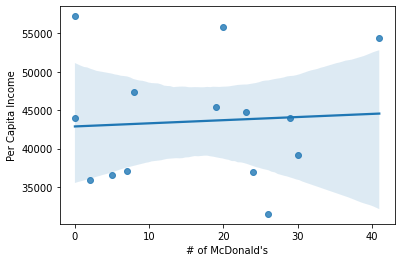

In [38]:
sb.regplot(x = "# of McDonald's", y = "Per Capita Income", data = complete_df)
plt.show()

Per Capita Income by County

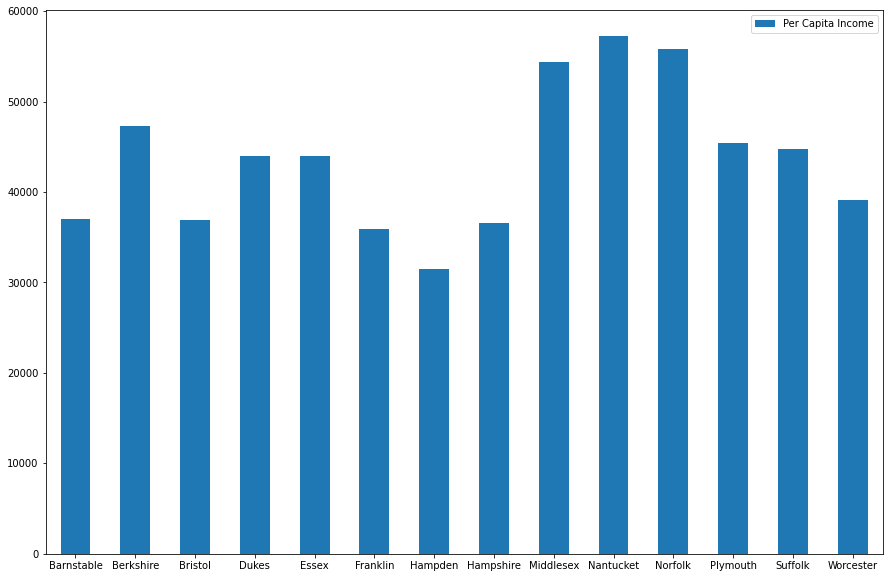

In [39]:
ax = pci_by_county.plot.bar(figsize =(15,10) ,rot=0)

Number of McDonald's by County

(The two 0.0% values are for Dukes and Nantucket counties, which have no McDonald's)

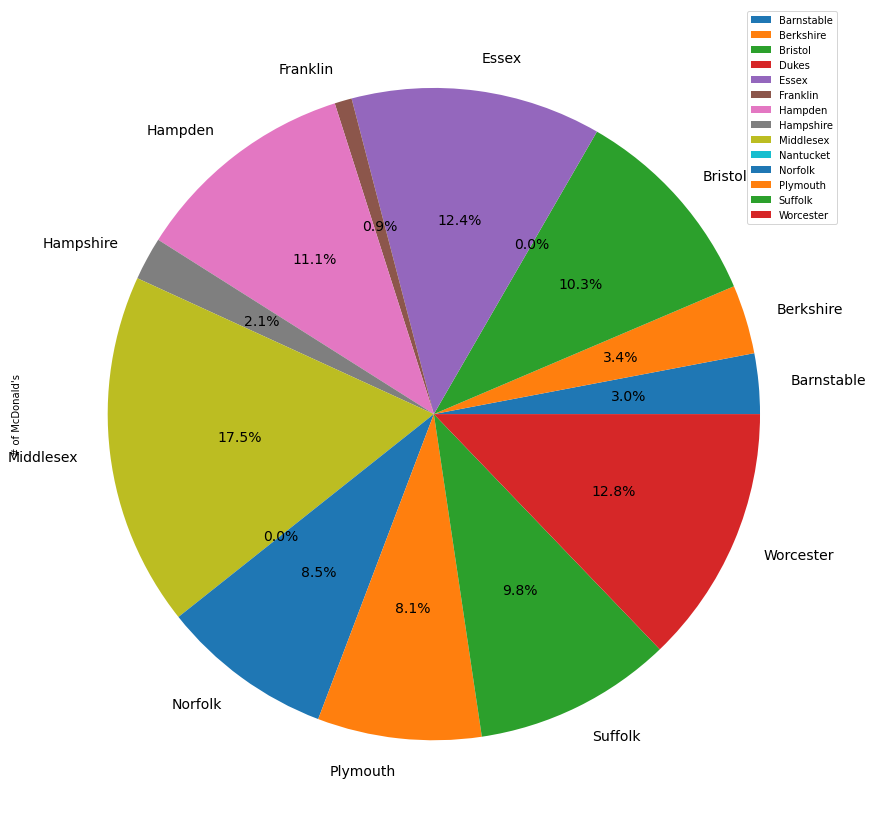

In [40]:
complete_df.plot.pie(y = "# of McDonald's", figsize=(15,15), autopct='%1.1f%%', fontsize=14)